<a href="https://drive.google.com/drive/folders/11Sp37Zj6NPHnBnDI9A5GH63nkNqvfojc?usp=sharing" target="_parent"><img src="https://ssl.gstatic.com/images/branding/product/1x/drive_2020q4_48dp.png" alt="Open In Google Drive"/></a>

In [2]:
!pip install -r requirements-colab.txt

Obtaining file:///home/haonguyentan/Essay.vfinal (from -r requirements-colab.txt (line 10))
  Using cached httpcore-0.16.2-py3-none-any.whl (68 kB)
  Using cached httpcore-0.16.1-py3-none-any.whl (68 kB)
  Using cached httpcore-0.16.0-py3-none-any.whl (68 kB)
  Using cached httpcore-0.15.0-py3-none-any.whl (68 kB)
  Attempting uninstall: httpcore
    Found existing installation: httpcore 0.16.3
    Uninstalling httpcore-0.16.3:
      Successfully uninstalled httpcore-0.16.3
  Attempting uninstall: src
    Found existing installation: src 1.0
    Uninstalling src-1.0:
      Successfully uninstalled src-1.0
  Running setup.py develop for src
You should consider upgrading via the '/home/haonguyentan/.pyenv/versions/3.8.10/bin/python3.8 -m pip install --upgrade pip' command.


In [3]:
import torch
from src import models
from PIL import Image

device = "cpu"
checkpoint = "./models/final_models.ckpt"
config = "./models/config.yaml"
        

In [4]:
@torch.no_grad()
def infer(model, prompt, n_samples, scale, skips=250):
    images, clip_score = model(prompt, n_samples_per_txt=n_samples, cond_scale=scale, skips=skips, clip_sort=True)
    images = images.cpu()
    make_im = lambda x: (255*x.clamp(-1, 1)/2 + 127.5).to(torch.uint8).permute(1,2,0).numpy()
    images = [Image.fromarray(make_im(x)) for x in images]
    return images, clip_score

model = models.StyleGAN(config, device, checkpoint)

In [5]:
captions = 'pretty girl' # @param {'type': 'string'}

In [6]:
outputs, clip_score = infer(model, captions, 4, 4)

sampling loop time step: 100%|██████████| 4/4 [00:00<00:00, 13.28it/s]


<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>


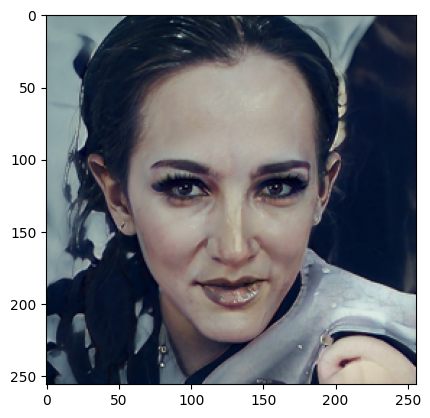

In [10]:
import matplotlib.pyplot as plt

for img in outputs:
    print(type(img))
    img.save("static/fileName.jpg")
    plt.imshow(img.resize((256, 256)))